In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

In [2]:
df = pd.read_csv("val_results.csv")
print(df.columns)
print(df.shape)

Index(['18k_correct', '18k_preds', '700k_strong_correct', '700k_strong_preds',
       '9k_correct', '9k_preds', 'cnn_lstm_sa_mlp_correct',
       'cnn_lstm_sa_mlp_preds', 'cnn_lstm_sa_correct', 'cnn_lstm_sa_preds',
       'cnn_lstm_correct', 'cnn_lstm_preds', 'lstm_correct', 'lstm_preds',
       'image_index', 'question_index', 'question_family_index', 'answer',
       'question', 'image_filename', 'answer_index'],
      dtype='object')
(149991, 21)


In [3]:
# df_long = pd.DataFrame(columns = ["model", "pred", "correct", 
#                                   'image_index', 'image_filename',
#                                   'question_index', 'question_family_index', 'question',
#                                   'answer',  'answer_index'])
# image_index_col = df["image_index"]
# image_filename_col = df["image_filename"]
# question_index_col = df["question_index"]
# question_family_index_col = df["question_family_index"]
# question_col = df["question"]
# answer_col = df["answer"]
# answer_index_col = df["answer_index"]

# for model in ['18k', '700k_strong', '9k', 'cnn_lstm_sa_mlp', 'cnn_lstm_sa',  'cnn_lstm', 'lstm']:
#     print(model)
#     model_df = pd.DataFrame(columns = ["model", "pred", "correct", 
#                                   'image_index', 'image_filename',
#                                   'question_index', 'question_family_index', 'question',
#                                   'answer',  'answer_index'])
    
#     model_df["pred"] = df[model + "_preds"]
#     model_df["correct"] = df[model + "_correct"]
#     model_df["image_index"] = image_index_col
#     model_df["image_filename"] = image_filename_col
#     model_df["question_index"] = question_index_col
#     model_df["question_family_index"] = question_family_index_col
#     model_df["question"] =question_col
#     model_df["answer"] = answer_col
#     model_df["answer_index"] = answer_index_col
#     model_df["model"] = str(model)

#     df_long = df_long.append(model_df)
# df_long.to_csv("val_results_long.csv", index = False)
df_long = pd.read_csv("val_results_long.csv")
df_long[:3]
    

,model,pred,correct,image_index,image_filename,question_index,question_family_index,question,answer,answer_index,answer_dictionary_index
0,18k,24,1,0,CLEVR_val_000000.png,0,39,Are there any other things that are the same s...,no,24,1
1,18k,31,1,0,CLEVR_val_000000.png,1,47,Is there a big brown object of the same shape ...,yes,31,0
2,18k,23,1,0,CLEVR_val_000000.png,2,87,What is the material of the big purple object?,metal,23,11


In [6]:
answer_dictionary = pd.read_csv("answer_dictionary.csv")
# answer_dictionary = answer_dictionary.sort_values(by = "answer_type")
# answer_dictionary["index_answer"] = answer_dictionary.apply(
#     lambda x: str(x["number"]) + "_" + str(x["answer"]), axis =1)
# answer_dictionary = answer_dictionary[["answer", "number", "answer_type", "index_answer"]]
# answer_dictionary.to_csv("answer_dictionary.csv", index = False)
# answer_dictionary["answer_dictionary_index"] = answer_dictionary.index
answer_dictionary[:3]
# answer_dictionary.to_csv("answer_dictionary.csv", index = False)

,answer,number,answer_type,index_answer,answer_dictionary_index
0,yes,31,binary,31_yes,0
1,no,24,binary,24_no,1
2,red,26,colour,26_red,2


In [13]:
# df_long["answer_dictionary_index"] = ""
# for i in range(df_long.shape[0]):
#     try:
#         df_long.at[i, "answer_dictionary_index"] = answer_dictionary[answer_dictionary["number"] == df_long.loc[i, "answer_index"]]["answer_dictionary_index"].values[0]
#     except:
#         print("faile at ", i)
#     if i %10000 == 0:
#         print(i)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000


In [15]:
df_long.to_csv("val_results_long.csv", index = False)

In [7]:
correct_columns = ['18k_correct',
                   '700k_strong_correct',
                   '9k_correct', 
                   'cnn_lstm_sa_mlp_correct',
                   'cnn_lstm_sa_correct',
                   'cnn_lstm_correct', 
                   'lstm_correct']
pred_columns = ['18k_preds',
                   '700k_strong_preds',
                   '9k_preds', 
                   'cnn_lstm_sa_mlp_preds',
                   'cnn_lstm_sa_preds',
                   'cnn_lstm_preds', 
                   'lstm_preds']
print(answer_dictionary[:3])

  answer  number answer_type index_answer  answer_dictionary_index
0    yes      31      binary       31_yes                        0
1     no      24      binary        24_no                        1
2    red      26      colour       26_red                        2


In [8]:
answer_matrix = pd.DataFrame(data = [], columns = answer_dictionary["answer_dictionary_index"], index = answer_dictionary["answer_dictionary_index"])
for row_pred in answer_dictionary["answer_dictionary_index"]:
    for col_target in answer_dictionary["answer_dictionary_index"]:
        answer_index_target = answer_dictionary.loc[col_target, "number"]
        answer_index_pred = answer_dictionary.loc[row_pred, "number"]
        number = df_long[(df_long["pred"] == answer_index_pred) & (df_long["answer_index"] == answer_index_target)].shape[0]
        answer_matrix.at[row_pred, col_target] = number

for col in answer_matrix.columns:
    answer_matrix[col] = answer_matrix[col].astype(int)
answer_matrix

answer_dictionary_index,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
answer_dictionary_index,,,,,,,,,,,,,,,,,,,,,
0,147237,35803,3,6,9,6,10,6,10,8,...,0,11,9,0,0,4,2,10,10,21
1,61294,181445,6,7,6,7,8,4,6,4,...,0,6,0,0,1,4,4,31,33,19
2,0,0,7594,451,359,523,281,374,500,529,...,0,0,0,0,0,3,7,9,9,22
3,0,0,565,8443,686,489,490,400,420,558,...,0,0,0,0,0,1,0,11,6,12
4,0,0,125,234,7966,207,273,196,165,189,...,0,0,0,0,0,0,4,6,8,13
5,0,0,231,202,265,7522,165,209,211,245,...,0,0,0,0,0,0,3,7,9,14
6,0,0,244,322,581,326,8242,374,292,386,...,0,0,0,0,0,0,4,7,15,25
7,0,0,196,167,295,202,312,7797,225,279,...,0,0,0,0,0,0,1,30,39,15
8,1,0,2111,1916,2160,2282,2122,2389,9605,2257,...,0,0,0,0,0,1,1,14,21,16


In [23]:
ans = pd.DataFrame(data = [], columns = ["pred", "target", "occurrances"])
for row_pred in answer_matrix.index:
    for col_target in answer_matrix.columns:
#         print([row_pred, col_target, answer_matrix.loc[row_pred, col_target]])
#         print([row_pred, col_target, answer_matrix.loc[row_pred, col_target]])
        mini = pd.DataFrame(data = [[row_pred, col_target, answer_matrix.loc[row_pred, col_target]]], columns =  ["pred", "target", "occurrances"])
#         print(mini)
        ans = ans.append(mini)
ans

,pred,target,occurrances
0,0,0,147237
0,0,1,35803
0,0,2,3
0,0,3,6
0,0,4,9
...,...,...,...
0,27,23,0
0,27,24,0
0,27,25,6249
0,27,26,6519


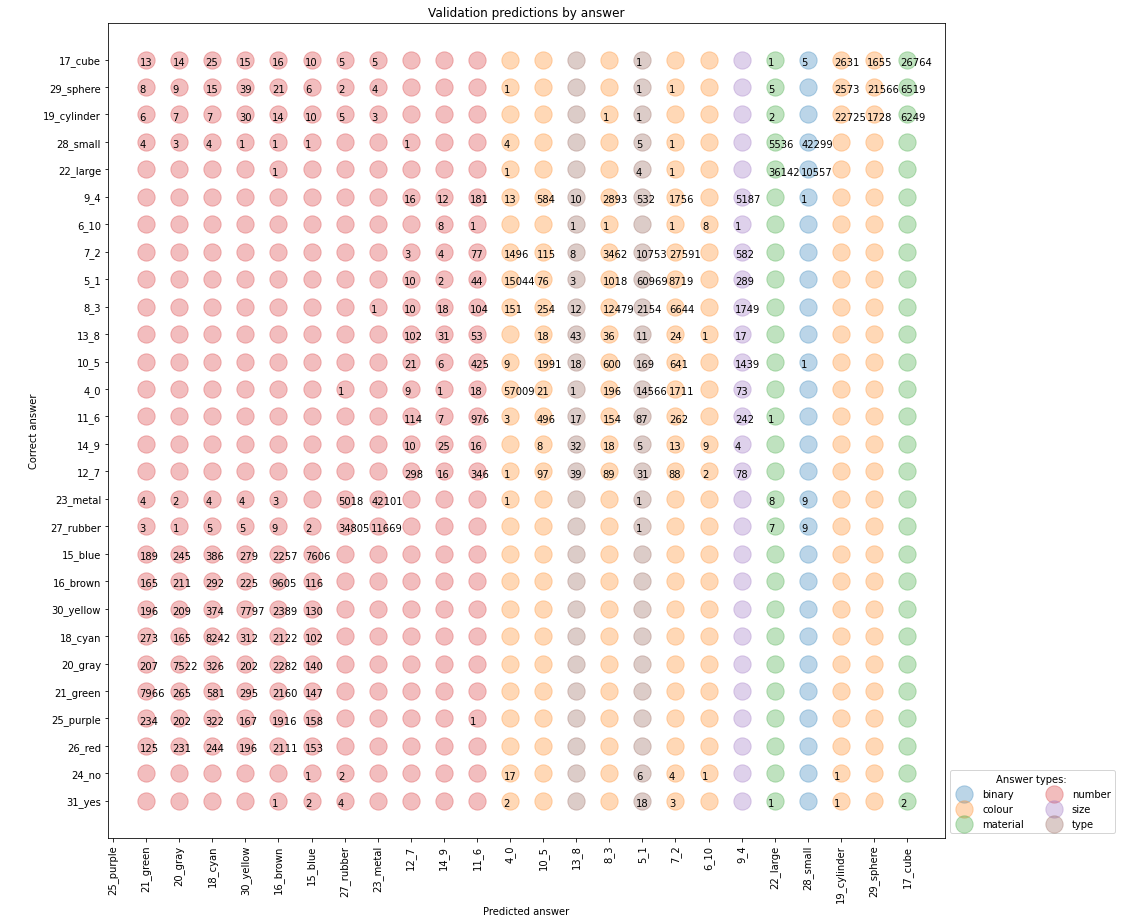

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
ax.set_xlabel('Predicted answer')
ax.set_ylabel('Correct answer')
plt.title('Validation predictions by answer')
plt.xticks(answer_dictionary["answer_dictionary_index"], 
           answer_dictionary["index_answer"], 
           rotation = 90)
plt.yticks(answer_dictionary["answer_dictionary_index"], 
           answer_dictionary["index_answer"])
artists= []
answer_types = answer_dictionary["answer_type"].drop_duplicates()
for answer_type in answer_types:
    answer_indices = answer_dictionary[answer_dictionary["answer_type"]== answer_type]["number"].values
    filtered = ans[ans["target"].isin(answer_indices)]
    art = plt.scatter(filtered["target"], 
                      filtered["pred"],
                      alpha = 0.3, 
                      s = 300)
    artists.append(art)
    
for row in answer_matrix.index:
    for col in answer_matrix.columns:
        if answer_matrix.at[row,col] > 0:
            ax.annotate(answer_matrix.at[row,col], (row-0.2,col-0.2))
    
plt.legend(handles = tuple(artists), 
           labels = tuple(answer_types), 
           title='Answer types: ', 
           loc="lower left", 
           bbox_to_anchor=(1, 0), 
           ncol = 2)

fig.savefig("val_answer_type.png", bbox_inches= "tight")
plt.show()


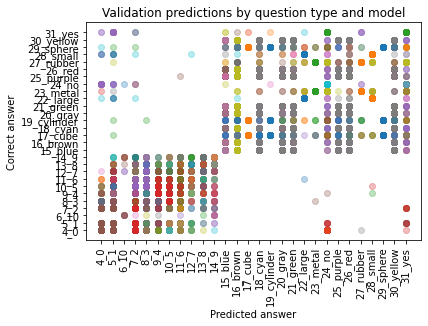

In [42]:
fig, ax = plt.subplots()
ax.set_xlabel('Predicted answer')
ax.set_ylabel('Correct answer')
plt.title('Validation predictions by question type and model')
plt.xticks(answer_dictionary["number"], 
           answer_dictionary["index_answer"], 
           rotation = 90)
plt.yticks(answer_dictionary["number"], 
           answer_dictionary["index_answer"])

artists= []

for question_type in df["question_family_index"].drop_duplicates():
    filtered_df = df[df["question_family_index"] == question_type]
    for pred in pred_columns:
        art = plt.scatter(filtered_df[pred], filtered_df["answer_index"], alpha = 0.3)
        artists.append(art)
    
# plt.legend(title='Cégek (UP_TH):', loc="lower left", bbox_to_anchor=(1, -0.2))

# fig.savefig("fogyasztas_valtozasa_az_evek_soran2.png", bbox_inches= "tight")
plt.show()


([<matplotlib.axis.XTick at 0x1b69709e550>,
 [Text(0.5, 0, '31'),
  Text(1.5, 0, '24'),
  Text(2.5, 0, '26'),
  Text(3.5, 0, '25'),
  Text(4.5, 0, '21'),
  Text(5.5, 0, '20'),
  Text(6.5, 0, '18'),
  Text(7.5, 0, '30'),
  Text(8.5, 0, '16'),
  Text(9.5, 0, '15'),
  Text(10.5, 0, '27'),
  Text(11.5, 0, '23'),
  Text(12.5, 0, '12'),
  Text(13.5, 0, '14'),
  Text(14.5, 0, '11'),
  Text(15.5, 0, '4'),
  Text(16.5, 0, '10'),
  Text(17.5, 0, '13'),
  Text(18.5, 0, '8'),
  Text(19.5, 0, '5'),
  Text(20.5, 0, '7'),
  Text(21.5, 0, '6'),
  Text(22.5, 0, '9'),
  Text(23.5, 0, '22'),
  Text(24.5, 0, '28'),
  Text(25.5, 0, '19'),
  Text(26.5, 0, '29'),
  Text(27.5, 0, '17')])

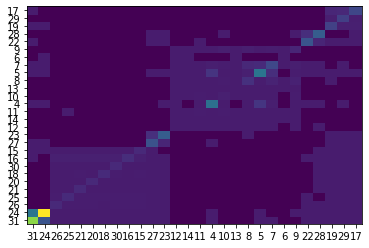

In [36]:
answer_matrix2 = answer_matrix
for row in answer_matrix2.index:
    for col in answer_matrix2.columns:
        if answer_matrix2.at[row,col] == 0:
            answer_matrix2.at[row, col ] = -15000

# ax = sns.heatmap(answer_matrix)

plt.pcolor(answer_matrix2)
plt.yticks(np.arange(0.5, len(answer_matrix2.index), 1), answer_matrix2.index)
plt.xticks(np.arange(0.5, len(answer_matrix2.columns), 1), answer_matrix2.columns)